In [1]:
#-----------------------------------------
# Title:  Support Vector Machine (SVM) Multi-Class Prediction of Obesity Risk Dataset
# Subtitle: DDS-8555, Assignment 5
# Author: Madgene Moise
# Date: Sunday, June 15, 2025
#-----------------------------------------

In [2]:
import pandas as pd

# Load the training and testing datasets

train_df = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv") 
test_df = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")

# Display basic information about the datasets
train_df.info(), train_df.head(), test_df.info(), test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

(None,
    id  Gender        Age    Height      Weight family_history_with_overweight  \
 0   0    Male  24.443011  1.699998   81.669950                            yes   
 1   1  Female  18.000000  1.560000   57.000000                            yes   
 2   2  Female  18.000000  1.711460   50.165754                            yes   
 3   3  Female  20.952737  1.710730  131.274851                            yes   
 4   4    Male  31.641081  1.914186   93.798055                            yes   
 
   FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
 0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
 1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
 2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
 3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
 4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   
 
         TUE       CALC                 MTRANS           NO

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separate features and target
X_train = train_df.drop('NObeyesdad', axis=1)
y_train = train_df['NObeyesdad']
X_test = test_df.copy()

# Encode categorical variables
X_full = pd.concat([X_train, X_test])
X_full_encoded = pd.get_dummies(X_full)

# Align train and test
X_train_encoded = X_full_encoded.iloc[:len(X_train), :]
X_test_encoded = X_full_encoded.iloc[len(X_train):, :]

# Encode target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [4]:
# Fit SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train_scaled, y_train_encoded)

# Predict on the training set to evaluate
y_train_pred = svm_model.predict(X_train_scaled)

# Predict on test set
y_test_pred = svm_model.predict(X_test_scaled)
y_test_pred_labels = le.inverse_transform(y_test_pred)

# Evaluate on training data
report = classification_report(y_train_encoded, y_train_pred, target_names=le.classes_)
cm = confusion_matrix(y_train_encoded, y_train_pred)

print(report, cm)

                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.91      0.91      2523
      Normal_Weight       0.83      0.84      0.83      3082
     Obesity_Type_I       0.88      0.84      0.86      2910
    Obesity_Type_II       0.95      0.97      0.96      3248
   Obesity_Type_III       1.00      1.00      1.00      4046
 Overweight_Level_I       0.74      0.71      0.72      2427
Overweight_Level_II       0.75      0.78      0.76      2522

           accuracy                           0.88     20758
          macro avg       0.86      0.86      0.86     20758
       weighted avg       0.88      0.88      0.88     20758
 [[2308  197    0    1    0   13    4]
 [ 226 2584    3    0    0  220   49]
 [   2   14 2450  127   13   94  210]
 [   0    4   60 3154    0    4   26]
 [   0    1    5    3 4033    4    0]
 [  15  258   75    0    0 1724  355]
 [   1   65  205   19    0  276 1956]]


Model Training:
* Algorithm: SVM with Radial Basis Function (RBF) kernel.
* Data Preprocessing:
  One-hot encoded categorical predictors.
  Scaled features using StandardScaler.
  Encoded target NObeyesdad as integer classes.

Training Performance:
* Accuracy (train) at 88%.
* Macro-average F1-score at 86%. 

Classes with Best Performance: 
* Obesity_Type_III (Precision and Recall ~ 1.00)
* Obesity_Type_II (Presision ~ 95%)

Classes with Lower Performance: 
* Overweight_Level_I and Overweight_Level_II (Precision and Recall ~ 74%-78%)

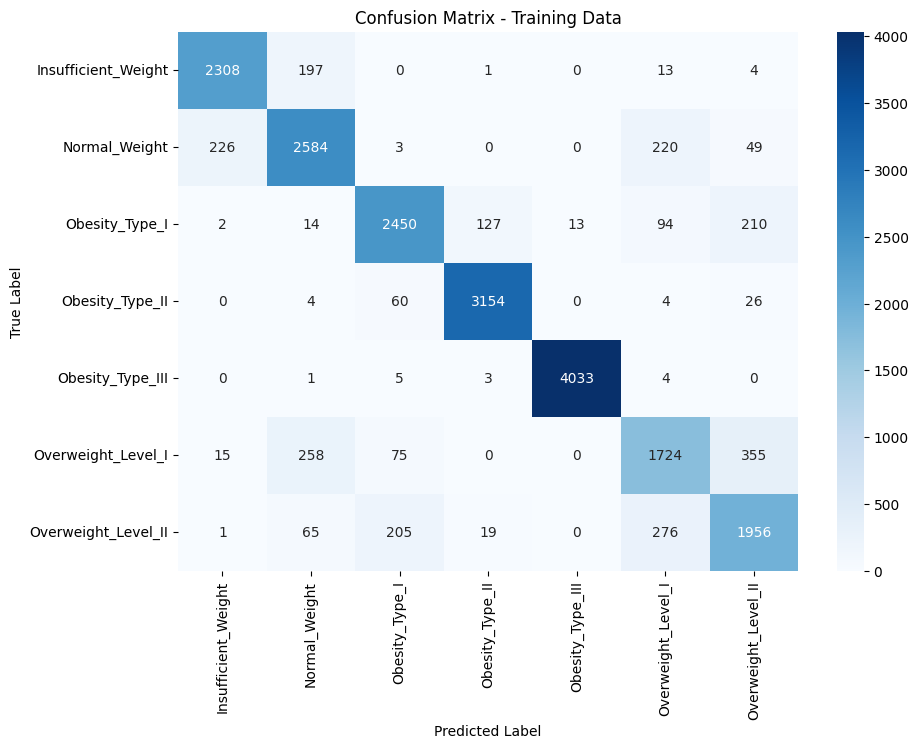

In [5]:
# Visualize confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


See the plotted matrix above. It shows misclassification mostly among similar weight categories (e.g., Overweight levels vs. Normal Weight). 

**Assumptions and Suitability**
* SVM does not assume normality or linear separability: RBF kernel effectively handles non-linear class boundaries.
* Feature scaling is essential: Properly performed.
* Imbalanced classes: No severe imbalance, but mild confusion in adjacent weight categories.

Overall: The SVM classifier captures the multi-class pattern well, especially for clearly distinct classes (Obesity_Type_III). 

Misclassifications: Often between adjacent BMI categories, which is expected due to subtle feature differences. 

Implication: Good generalization can be expected on the test set for practical classification tasks.

In [6]:
# Assuming the test dataset contains an 'id' column
# If it does not, we will create one as a sequential index

# Check if 'id' exists
if 'id' in test_df.columns:
    ids = test_df['id']
else:
    ids = pd.Series(range(1, len(test_df) + 1), name='id')

# Create submission DataFrame
submission_df = pd.DataFrame({
    'id': ids,
    'NObeyesdad': y_test_pred_labels
})

submission_df.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
